# NLP Workshop Part 2 
## Intro to Word Embeddings, Clustering, and Dimensionality Reduction
*Working with Words*

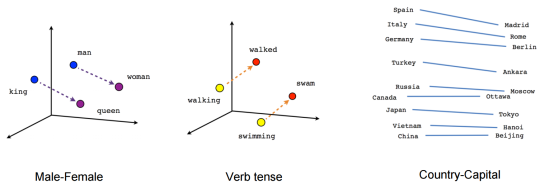

## Last week
- Markov Chain
- RNNs
- Text Generation

## Table of Contents
1. Word Embeddings
  - One-Hot Encoding
  - Continuous Bag-of-Words
2. Clustering
3. Dimensionality Reduction
4. Applications


## Word Embeddings
### What are Word Embeddings?
> A numerical way to represent words! 
> Computers, scripts, ML models, etc... can't understand human words right? So we need some way to translate human language to computer language.

### How?
> There have been many ways developed to do this, NLP is a massive subset of Machine Learning after all. The first that we're going to talk about is called "One-Hot Encoding" or "One-Hot Embedding"

## One-Hot
*Too hot to handle*

This is one of the simplest ways to represent words as numbers (in vector form). 

Take the case of trying to represent the colors Red, Blue, and Yellow. You *could* say Red is 0, Blue is 1, and Yellow is 2.


**But wait, is Red a closer color to Blue than Yellow?**

Without going into color physics, no, right? So what can we do instead...

How about representing each one of these "categorial" values as its own dimension in a vector?

<Red, Blue, Yellow>

So, Red is < 1 0 0 >

Blue is < 0 1 0 >

Yellow is < 0 0 1 >

#### Cool! We've now got a pretty easy way to represent words as a vector
Each time we add another word to our "corpus", we can just add another dimension to our vector denoting if the input is that word. 

Going with our example from above, "Green" would be < 0 0 0 1 >

### Issues with One-Hot:
#### **Space and Runtime**:
> What if we have 50 distinct words in our corpus? We'd need a 50-dimension vector. 

> By this sentence, we've used 128 distinct words in this workshop, that means we would have to have a 128-dimension vector *for each word* in the text you've read so far!

> That's a **lot** of data to store, most of which would be 0's.

*A sidenote: when you see a lot of 0's in some data like this, people usually call it "sparse"*

> So, as you increase the size of your vocabulary/corpus, you also have to increase the size of the vectors you store for each word. 

#### **Word Similarity**:
> Intuitively as humans, we know that a word like "Strawberry" is closer to the word "Mango" than the word "Dog". "Strawberry" and "Mango" are at least fruits so they should be related in some way right?

> One-Hot Encoding can't achieve this property so what can we do to make it better?

## Continuous Vectors!

Instead of representing each dimension of a vector as a binary yes/no, can't we do something where each dimension represents a quality?

Note that these values are arbitrary.

| Word | Fuzzy | Fruit |
| --- | --- | --- |
| Strawberry  | 0.104 | .953 |
| Mango  | 0.093 | .755 |
| Dog  | 0.847 | .008 |

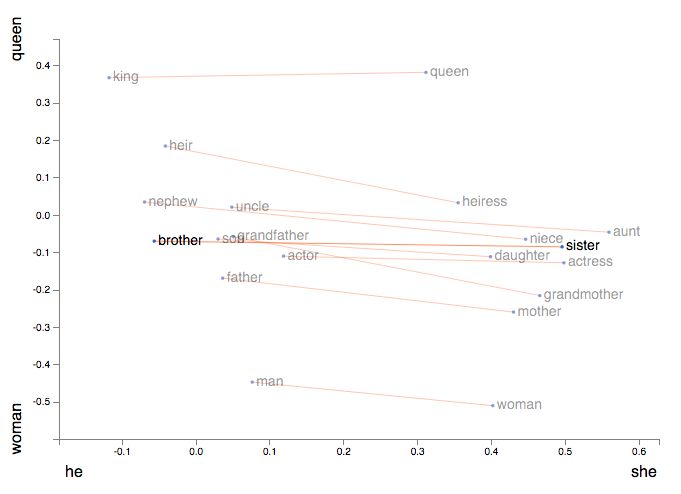

## How do we build this? With Neural Nets! CBOW vs Skip-Gram

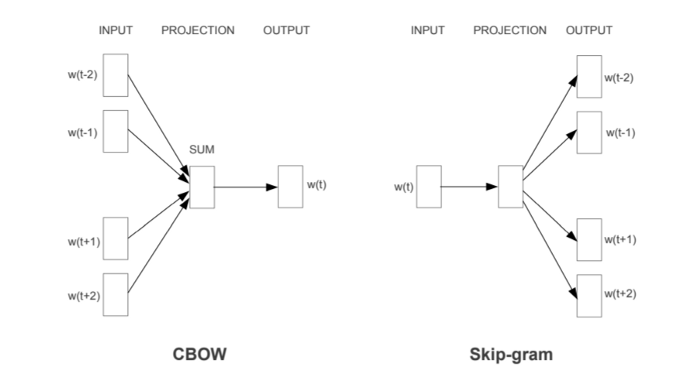

### Continuous Bag Of Words and Skip-Gram are two popular ways to accomplish this task of word embedding.

CBOW learns to predict a word based on its surrounding words.

Skip-Gram does the "opposite" by learning to predict surrounding words given a word.

These are both great methods for word embedding:
- CBOW is faster to train and works well for frequent words
- Skip-Gram needs less training data and works well for rare words

We're going to dive into CBOW this workshop.

## Continuous Bag Of Words

We'll start off with the One-Hot Embedding we had before. This gives us a baseline we can build off to train our model.

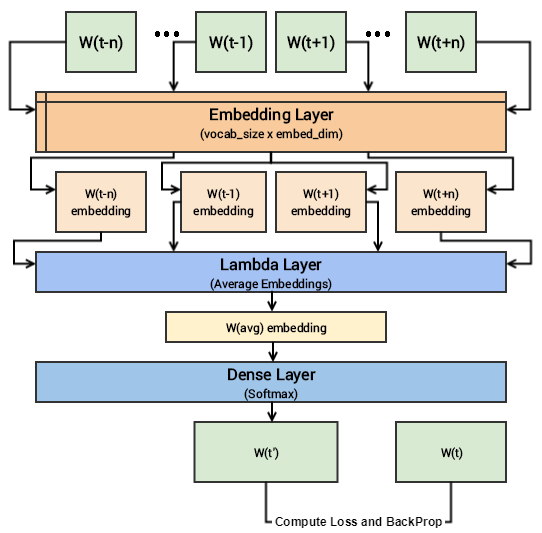

## Three Core Steps:

<ol>
  <li>Embedding</li>
  <li>Hidden (Lambda) Layers</li>
  <li>Softmax Function</li>
</ol>

### Embedding
This is the step where we gather the neighboring words' one-hot vectors inside the "window" for our "target" word. We then feed these vectors into our neural net.

For example, if we have a window of size 2, we'll be looking to the left and right 2 words of our target.

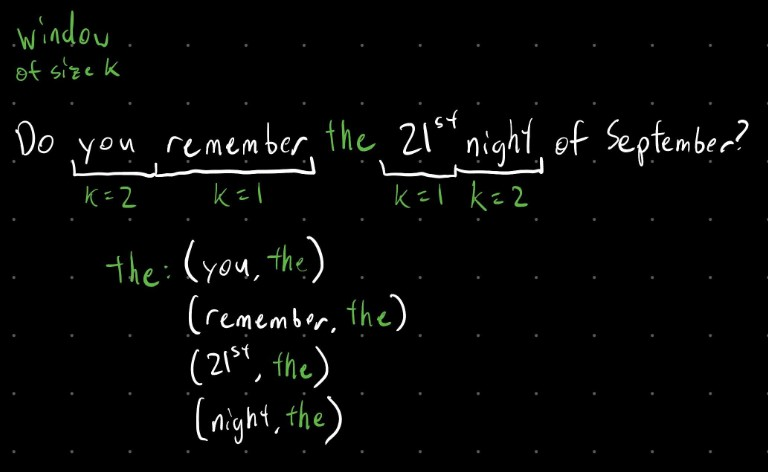

Just so it's clear, this is what the one-hot vectors would look like for the words in the sentence: "Do you remember the 21st night of September"

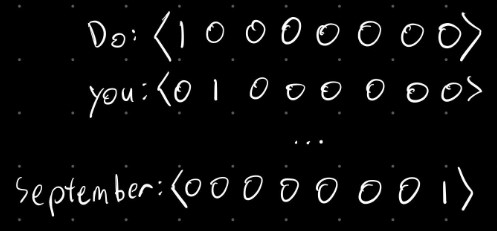

So when we have a window size of 2, we're going to have 4 input layers. 

In our example of using "the" as the target word, we'd use the vectors from "you", "remember", "21st", "night".

This leads us into the Hidden Layer!

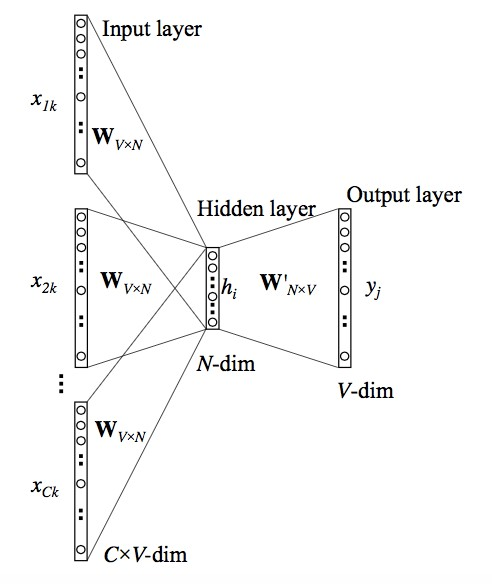

The Hidden Layers are where the core of the neural net portion of CBOW happens. Usually, you have N neurons and you receive an output vector of the same dimensions as one of your original neighbor vectors.

In the last step, we pass this vector of numbers to a softmax function. The softmax function pretty much smoothes out your given vector to a vector of probabilities based on each element's magnitude.

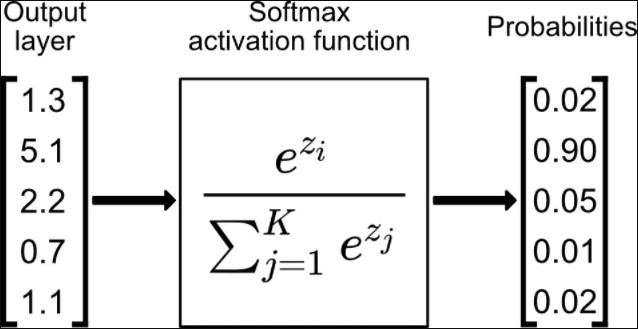

### And that's it!
You get something that looks like this in the end:
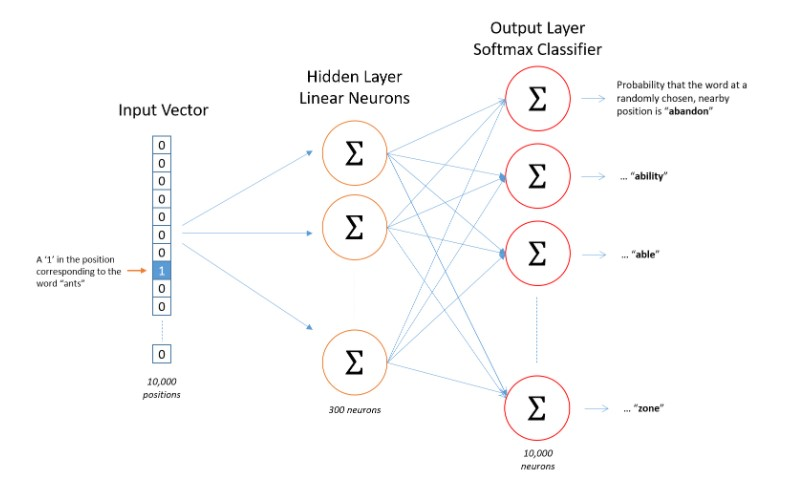

In [ ]:
#@title Setup cell, helper functions, data cleaning, etc... ((☞ﾟ∀ﾟ)☞ Open me if you dare)

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
from nltk.corpus import stopwords 

nltk.download('gutenberg')
from nltk.corpus import gutenberg
from string import punctuation

bible = gutenberg.sents('bible-kjv.txt') 
remove_terms = punctuation + '0123456789'

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)


def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

wpt = nltk.WordPunctTokenizer()
stop_words = stopwords.words('english')
nltk.download('punkt')

norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]


print("Setup Complete!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Setup Complete!


In [ ]:
print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


In [ ]:
# Tokenize the input text

from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


In [ ]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['old', 'testament', 'james', 'bible'] -> Target (Y): king
Context (X): ['first', 'book', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['beginning', 'god', 'heaven', 'earth'] -> Target (Y): created
Context (X): ['earth', 'without', 'void', 'darkness'] -> Target (Y): form
Context (X): ['without', 'form', 'darkness', 'upon'] -> Target (Y): void
Context (X): ['form', 'void', 'upon', 'face'] -> Target (Y): darkness
Context (X): ['void', 'darkness', 'face', 'deep'] -> Target (Y): upon
Context (X): ['spirit', 'god', 'upon', 'face'] -> Target (Y): moved
Context (X): ['god', 'moved', 'face', 'waters'] -> Target (Y): upon
Context (X): ['god', 'said', 'light', 'light'] -> Target (Y): let
Context (X): ['god', 'saw', 'good', 'god'] -> Target (Y): light


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            1242500   
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 12425)             1254925   
Total params: 2,497,425
Trainable params: 2,497,425
Non-trainable params: 0
_________________________________________________________________
None


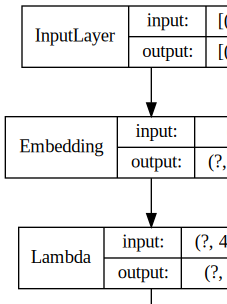

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
epochs = 6

for epoch in range(1, epochs):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

similar_words

Demo: Building CBOW from scratch [here!](https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/feature%20engineering%20text%20data/Feature%20Engineering%20Text%20Data%20-%20Advanced%20Deep%20Learning%20Strategies.ipynb)

## Clustering

### Many options! We're going with [HDBSCAN](https://en.wikipedia.org/wiki/Cluster_analysis#Density-based_clustering) (Hierarchical Density-Based Spatial Clustering of Applications with Noise)
- Density-based clustering
- Creates groupings, clusters without parameter tuning

HDBSCAN Library Documentation: [link](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html)

In [ ]:
!pip install hdbscan
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import hdbscan

     |████████████████████████████████| 4.7MB 3.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301749 sha256=4eaca4c9e7cc095fcf07cf1489a1f775d3ba5ccf10505137297614faa1d08826
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
# remove this data (sample data that makes clusters)
data, labels = make_blobs(n_samples=20000, n_features=2, centers=20, center_box=(-40,40))
data

array([[ -1.43604173,  -8.21641361],
       [-31.61658811,  41.14849944],
       [ 15.37100382,  -8.98025108],
       ...,
       [-11.72810606,  13.35151564],
       [-18.43435951,  -5.20048526],
       [ -8.99156093,  22.11697628]])

![HDBSCAN image](https://hdbscan.readthedocs.io/en/latest/_images/distance5.svg)

![HDBSCAN image](https://hdbscan.readthedocs.io/en/latest/_images/how_hdbscan_works_10_1.png)

![HDBSCAN image](https://hdbscan.readthedocs.io/en/latest/_images/how_hdbscan_works_12_1.png)

In [ ]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(data)
len(np.unique(clusterer.labels_))

17

In [ ]:
# remove this cell (input data will be more than 2 dimensions)
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x = data[:,0], y = data[:,1],
                           mode = 'markers',
                           marker_color = clusterer.labels_,
                           hovertext = clusterer.labels_))
fig.show()

## Dimensionality Reduction


What is Dimenstionality Reduction??
It is a form of compressing or transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data. 


What goes on under the hood:

Construct the covariance matrix of the data.
Compute the eigenvectors of this matrix.
Eigenvectors corresponding to the largest eigenvalues are used to reconstruct a large fraction of variance of the original data.


Example: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python


![PCA image](https://lh3.googleusercontent.com/proxy/f5IBm8J1ArfmEpx_7MUAmOYEpAfnAgBYXic1SsRiQWWDzqknaXFHTwGdVAyZsfVE-CXdHeGSilRbgkArfDh4TtCFT_eYivU7ywNLql5O1AbOD0um4w)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import requests

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

In [ ]:
breast_data = breast.data
labels = np.reshape(breast.target,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [ ]:
breast_labels = breast.target
breast_dataset = pd.DataFrame(breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
labels = np.reshape(breast_labels,(569,1))

In [ ]:
breast_dataset.head()
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

In [ ]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(breast_dataset)

In [ ]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,1414.126817,110.222522
565,1045.019040,77.057573
566,314.502046,47.553423
567,1124.858290,34.129218
568,-771.527711,-88.643113


In [ ]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

<Figure size 432x288 with 0 Axes>

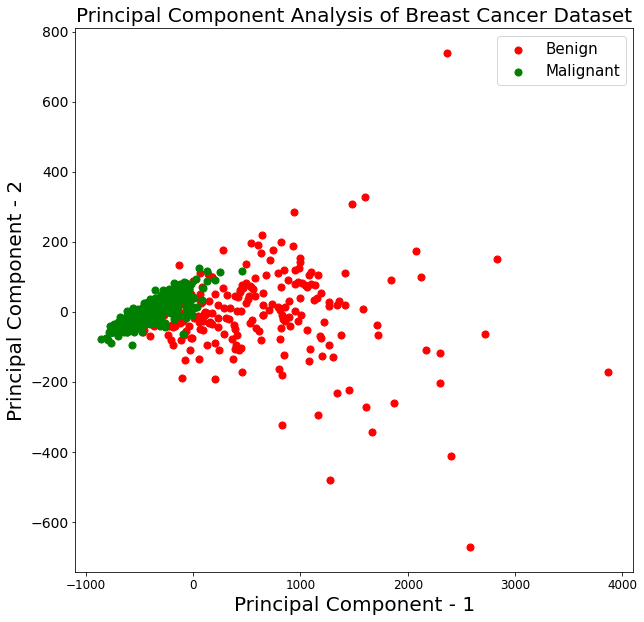

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

As you can see in this example is that there was a lot of variables representing this data. What we ultimately did was use PCA to visualize high dimensional data into lower dimensions. Without PCA we would not be able to visualize such high dimensional data. 

## Applications 
### Google's Word2Vec Pre-trained Model
Google's word2vec algorithm has a website and a few demos within that website, accessible here: https://code.google.com/archive/p/word2vec/

They also have an already trained model for us to play around with, which we'll be using here. This model was trained off of 100 billion words from Google News and trained using the word2vec algorithm described above. The resulting trained model has 3 million words with 300 dimensions. We'll be playing around with that here.

In [3]:
# Downloading the model
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [4]:
print(len(wv.vocab))
print(wv['king'].size)

3000000
300


In [5]:
# Closest words examples
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print(f"{w1}\t{w2}\t{wv.similarity(w1, w2):.2f}")

car	minivan	0.69
car	bicycle	0.54
car	airplane	0.42
car	cereal	0.14
car	communism	0.06


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [6]:
# Word vector addition, subtraction
print(wv.most_similar(positive=['car', 'minivan'], topn=5))
print(wv.most_similar(positive=['queen', 'man'], negative=['woman'], topn=5))
print(wv.most_similar(positive=['student', 'university'], negative=['undergraduate'], topn=5))
print(wv.most_similar(positive=['chancellor', 'UIUC'], topn=5))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('SUV', 0.853219211101532), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]
[('king', 0.6958590149879456), ('kings', 0.5950952768325806), ('queens', 0.5838501453399658), ('monarch', 0.5398427248001099), ('prince', 0.5223615169525146)]
[('school', 0.5797382593154907), ('campus', 0.5701981782913208), ('students', 0.5389893651008606), ('teacher', 0.5118393301963806), ('faculty', 0.5001642107963562)]
[('Chancellor', 0.6717683672904968), ('provost', 0.6585367918014526), ('university', 0.6151625514030457), ('vice_chancellor', 0.6058473587036133), ('chancellorship', 0.6058245897293091)]


In [8]:
vectors = [] # positions in vector space
labels = [] # keep track of words to label our data again later

words = wv.most_similar(positive=['UIUC'], topn=2000)

for word, similarity in words:
    # only choose a portion of the words
    vectors.append(wv[word])
    labels.append(word)

# convert both lists into numpy vectors for reduction
vectors = np.asarray(vectors)
labels = np.asarray(labels)

vectors.shape

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(2000, 300)

In [ ]:
clusterer = hdbscan.HDBSCAN(metric='haversine')
clusterer.fit(vectors)
print(len(np.unique(clusterer.labels_)))

92


In [ ]:
num_dimensions = 2  # final num dimensions (2D, 3D, etc)

# reduce using PCA
vectors = np.asarray(vectors)
tsne = PCA(n_components=num_dimensions)
vectors = tsne.fit_transform(vectors)

x_vals = np.asarray([v[0] for v in vectors])
y_vals = np.asarray([v[1] for v in vectors])

In [ ]:
# Plot the different groups
fig = go.Figure()
for label in np.unique(clusterer.labels_):
    # if not clustered, then skip
    if label == -1:
        continue
    new_x_vals = x_vals[clusterer.labels_ == label]
    new_y_vals = y_vals[clusterer.labels_ == label]
    new_labels = labels[clusterer.labels_ == label]
    fig.add_trace(go.Scatter(x=new_x_vals, y=new_y_vals,
                             mode='markers',
                             hovertext=new_labels))
fig.show()

### song2vec + Spotify Playlist Generator

Example result:
```
============================
SONGS PLAYLIST
============================
Selena - Como La Flor
The Texas Tornados - Who Were You Thinkin' Of
Selena - Sentimientos

============================
TOP 10 RECOMMENDED SONGS
============================
[Similarity: 0.800] Selena - Como La Flor
[Similarity: 0.747] Little Joe Y La Familia - Borrachera
[Similarity: 0.740] Selena - Sentimientos
[Similarity: 0.718] Jennifer Y Los Jetz - Me Piden
[Similarity: 0.711] Lorenzo Antonio - Con La Misma Espina
[Similarity: 0.710] Sparx - Lo Dice Mi Corazon
[Similarity: 0.708] The Texas Tornados - Who Were You Thinkin' Of
[Similarity: 0.692] The Texas Tornados - (Hey Baby) Que Paso
[Similarity: 0.685] Tierra Tejana - Eres Casado
[Similarity: 0.684] Fama - Sirveme Tequila
============================
```

Source Code here!
[song2vec](https://colab.research.google.com/github/tomytjandra/song2vec-music-recommender/blob/master/song2vec.ipynb)

## Some other cool resources you guys can look at!

Stanford: [DL for NLP](https://cs224d.stanford.edu/lecture_notes/notes1.pdf)

Another [Word2Vec Explanation](https://israelg99.github.io/2017-03-23-Word2Vec-Explained/)

## Overview:
In these last two workshops, we have learned about the use of Markov Models, RNN, One-Hot, CBOW, PCA, and Clustering in Natural Language Processing.

NLP is a massive field in research and industry, we've only scratched the surface on all there to explore! 

Examples you can find in the wild are things like the Google search engine, virtual assistants like Siri, predictive text, etc...
